In [60]:
!pip install scikit-plot
!pip install mord

  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9886 sha256=cc868f888ab4c76298f4bfa1ab54a52e6f9747df4ddab508e56ca86bcf368da2
  Stored in directory: /root/.cache/pip/wheels/77/00/19/3cea86fbfc737ec4acb515cd94497dcc33f943fa157548b96c
Successfully built mord


In [58]:
import pandas as pd
import numpy as np
from dmba import classificationSummary, gainsChart, liftChart
import matplotlib.pylab as plt

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
RidingMower_df = pd.read_csv("/content/drive/MyDrive/My Pitt/Python Programming/All Datasets/RidingMowers.csv")
RidingMower_df

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner
5,110.1,19.2,Owner
6,108.0,17.6,Owner
7,82.8,22.4,Owner
8,69.0,20.0,Owner
9,93.0,20.8,Owner


In [22]:
RidingMower_df['Owner_Binary'] = RidingMower_df['Ownership']=="Owner"

In [23]:
RidingMower_df['Owner_Binary'] = RidingMower_df['Owner_Binary'].astype(int)

In [24]:
RidingMower_df.drop(columns ='Ownership', inplace=True)
RidingMower_df

,Income,Lot_Size,Owner_Binary
0,60.0,18.4,1
1,85.5,16.8,1
2,64.8,21.6,1
3,61.5,20.8,1
4,87.0,23.6,1
5,110.1,19.2,1
6,108.0,17.6,1
7,82.8,22.4,1
8,69.0,20.0,1
9,93.0,20.8,1


In [10]:
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, \
                            accuracy_score, roc_curve, roc_auc_score

Q1. Divide the dataset "RidingMower_df" in training and test (40% test data) and run Logistic regression with "Owner_Binary" as y-variable and rest of the variables as x-variables.

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(RidingMower_df[["Income", "Lot_Size"]], RidingMower_df["Owner_Binary"], test_size=0.40, random_state=7)

Q2. Get the predicted probabilities in training data

In [35]:
import sklearn.linear_model as sklm
lreg = sklm.LogisticRegression(solver='liblinear')

In [36]:
lreg.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [87]:
lreg_predictions_tr = lreg.predict(X_train)
lreg_predictions_tr

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [43]:
lreg_predict_prob_tr = lreg.predict_proba(X_train)
lreg_predict_prob_tr

array([[0.54426107, 0.45573893],
       [0.26230739, 0.73769261],
       [0.59169162, 0.40830838],
       [0.59412713, 0.40587287],
       [0.48109059, 0.51890941],
       [0.63031467, 0.36968533],
       [0.51608732, 0.48391268],
       [0.50284242, 0.49715758],
       [0.49695639, 0.50304361],
       [0.44672314, 0.55327686],
       [0.50308878, 0.49691122],
       [0.55662316, 0.44337684],
       [0.43497369, 0.56502631],
       [0.65702576, 0.34297424]])

Q3. If the predicted probability is greater than 0.5, classify as 1 otherwise classify as 0.

Hint: use np.where()

In [70]:
ypredclass_tr2 = np.where(lreg_predict_prob_tr[:,1] > 0.5, 1, 0)
ypredclass_tr2

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

Q4. Obtain the confusion matrix using predictions and true values in the training data.

Hint: Use classificationSummary()

In [68]:
from dmba import classificationSummary, gainsChart, liftChart
classificationSummary(Y_train, lreg_predictions_tr)

Confusion Matrix (Accuracy 0.6429)

       Prediction
Actual 0 1
     0 6 2
     1 3 3


In [66]:
cm2 = confusion_matrix(Y_train, ypredclass_tr2)
cm2

array([[6, 2],
       [3, 3]])

In [57]:
print(classification_report(Y_train, lreg_predictions_tr))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.60      0.50      0.55         6

    accuracy                           0.64        14
   macro avg       0.63      0.62      0.63        14
weighted avg       0.64      0.64      0.64        14



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

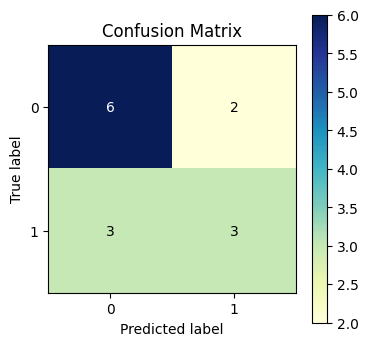

In [61]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_train, ypredclass_tr2, figsize=(4,4), cmap="YlGnBu")

Q5. Like the above questions, now predict on the **validation** data (unlike the training data in the above questions) and calculate the accuracy.

In [78]:
predict_vali = lreg.predict(X_test)
predict_vali

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [93]:
lreg_predict_prob_va = lreg.predict_proba(X_test)

In [80]:
print(classification_report(Y_test, predict_vali))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.67      0.67      0.67         6

    accuracy                           0.60        10
   macro avg       0.58      0.58      0.58        10
weighted avg       0.60      0.60      0.60        10



Q6. Plot the **gain and lift chart** using predictions probabilities on validation data and actual values in the validation data.

Hint: Use gainsChart() and liftChart()


In [92]:
predict_vali

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [105]:
logit_result_tr = pd.DataFrame({'actual': Y_test,
                             'p(0)': [p[0] for p in lreg_predict_prob_va],
                             'p(1)': [p[1] for p in lreg_predict_prob_va],
                             'predicted': predict_vali })

In [106]:
logit_result_tr

,actual,p(0),p(1),predicted
1,1,0.370951,0.629049,1
5,1,0.266327,0.733673,1
11,1,0.431087,0.568913,1
13,0,0.607506,0.392494,0
2,1,0.545786,0.454214,0
21,0,0.695154,0.304846,0
9,1,0.370377,0.629623,1
16,0,0.387832,0.612168,1
12,0,0.462364,0.537636,1
0,1,0.539107,0.460893,0


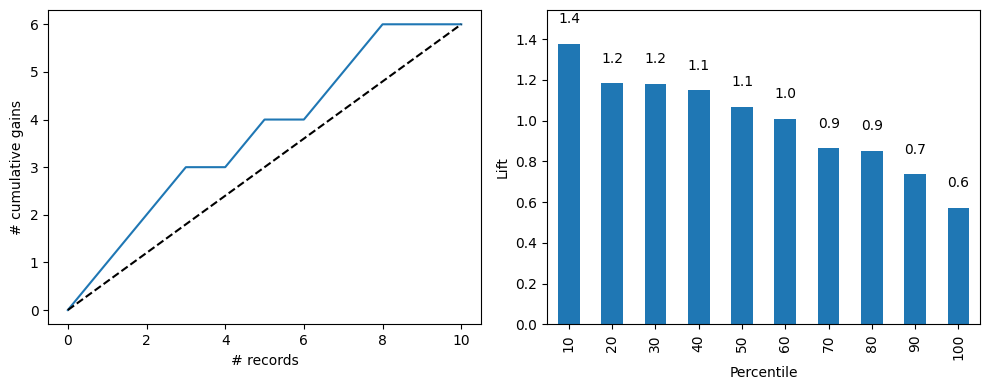

In [107]:
dfgains = logit_result_tr.sort_values(by='p(1)', ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(dfgains.actual, ax=axes[0])
liftChart(dfgains['p(1)'], title=False, ax=axes[1])

plt.tight_layout()
plt.show()

Q7. Plot the ROC Curve using the training data predicted probabilities and the actual values of y-variable in the training data.

Hint: Use roc_curve()

**dataset is small so that why the graph line is smooth.**

<ipython-input-108-36a93e11edf2>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='r')


Area under the curve (AUC):
 0.625


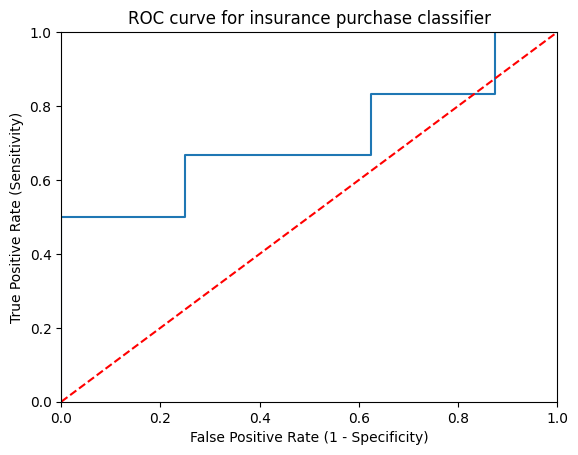

In [108]:
fpr, tpr, thresholds = roc_curve(Y_train, lreg_predict_prob_tr[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'k--', color='r')
plt.title('ROC curve for insurance purchase classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
print("Area under the curve (AUC):\n", roc_auc_score(Y_train, ypredclass_tr2))